# Tâche 6

Développons un notebook Jupyter (appelé "xrd.ipynb")

   - pour la structure du matériau ScNiBi.

   - pour déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å

In [168]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.core import DiffractionPattern, conv
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [169]:
mp_key = "7H4ydwHDAGw2EfDFEGcbuln7Cw6lpJsi"
mp_id ="mp-30459"


In [190]:
Lambda = 1.54060

In [191]:
prim_struc = MPRester(mp_key).get_structure_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [228]:
XRD = XRDCalculator(Lambda)
pattern=XRD.get_pattern(conv_struc)
print(f'Les angles où apparaissent les pics sont :\n {pattern.x}\n')
print(f'Les intensités respectives des pics sont : \n{pattern.y}\n')
print(f'Les differents indices ainsi que leurs multiplicité respective sont :\n {pattern.hkls}\n')
print(f'La distance inter-plan correspondant à chaque indice est :\n {pattern.d_hkls}\n')

Les angles où apparaissent les pics sont :
 [24.76212302 28.66897217 40.99103808 48.48112364 50.78602631 59.36118708
 65.31186376 67.23014763 74.66652388 80.06730933 88.89705953]

Les intensités respectives des pics sont : 
[ 73.73666996  44.5965328  100.          39.1241332   12.695993
  16.59448492  16.63937163  16.96324749  33.75120981  13.08083098
  11.22180068]

Les differents indices ainsi que leurs multiplicité respective sont :
 [[{'hkl': (1, 1, 1), 'multiplicity': 8}], [{'hkl': (2, 0, 0), 'multiplicity': 6}], [{'hkl': (2, 2, 0), 'multiplicity': 12}], [{'hkl': (3, 1, 1), 'multiplicity': 24}], [{'hkl': (2, 2, 2), 'multiplicity': 8}], [{'hkl': (4, 0, 0), 'multiplicity': 6}], [{'hkl': (3, 3, 1), 'multiplicity': 24}], [{'hkl': (4, 2, 0), 'multiplicity': 24}], [{'hkl': (4, 2, 2), 'multiplicity': 24}], [{'hkl': (3, 3, 3), 'multiplicity': 8}, {'hkl': (5, 1, 1), 'multiplicity': 24}], [{'hkl': (4, 4, 0), 'multiplicity': 12}]]

La distance inter-plan correspondant à chaque indice est :
 

## Les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) sont :

In [226]:

for i in range(3):
    Theta = pattern.x[i]
    Intensité = pattern.y[i]
    hkl = pattern.hkls[i][0]
    d_hkls = pattern.d_hkls[i]
    print(f'- Pic {i+1} ')
    print(f'   Les indices hkl et leurs multiplicité : {pattern.hkls[i][0]} apparaissentà 2Θ = {Theta}° avec pour distance inter-plan = {d_hkls}')


- Pic 1 
   Les indices hkl et leurs multiplicité : {'hkl': (1, 1, 1), 'multiplicity': 8} apparaissentà 2Θ = 24.76212302367261° avec pour distance inter-plan = 3.5926079217498716
- Pic 2 
   Les indices hkl et leurs multiplicité : {'hkl': (2, 0, 0), 'multiplicity': 6} apparaissentà 2Θ = 28.668972171951253° avec pour distance inter-plan = 3.1112897260726053
- Pic 3 
   Les indices hkl et leurs multiplicité : {'hkl': (2, 2, 0), 'multiplicity': 12} apparaissentà 2Θ = 40.991038080524106° avec pour distance inter-plan = 2.200014063541975


<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

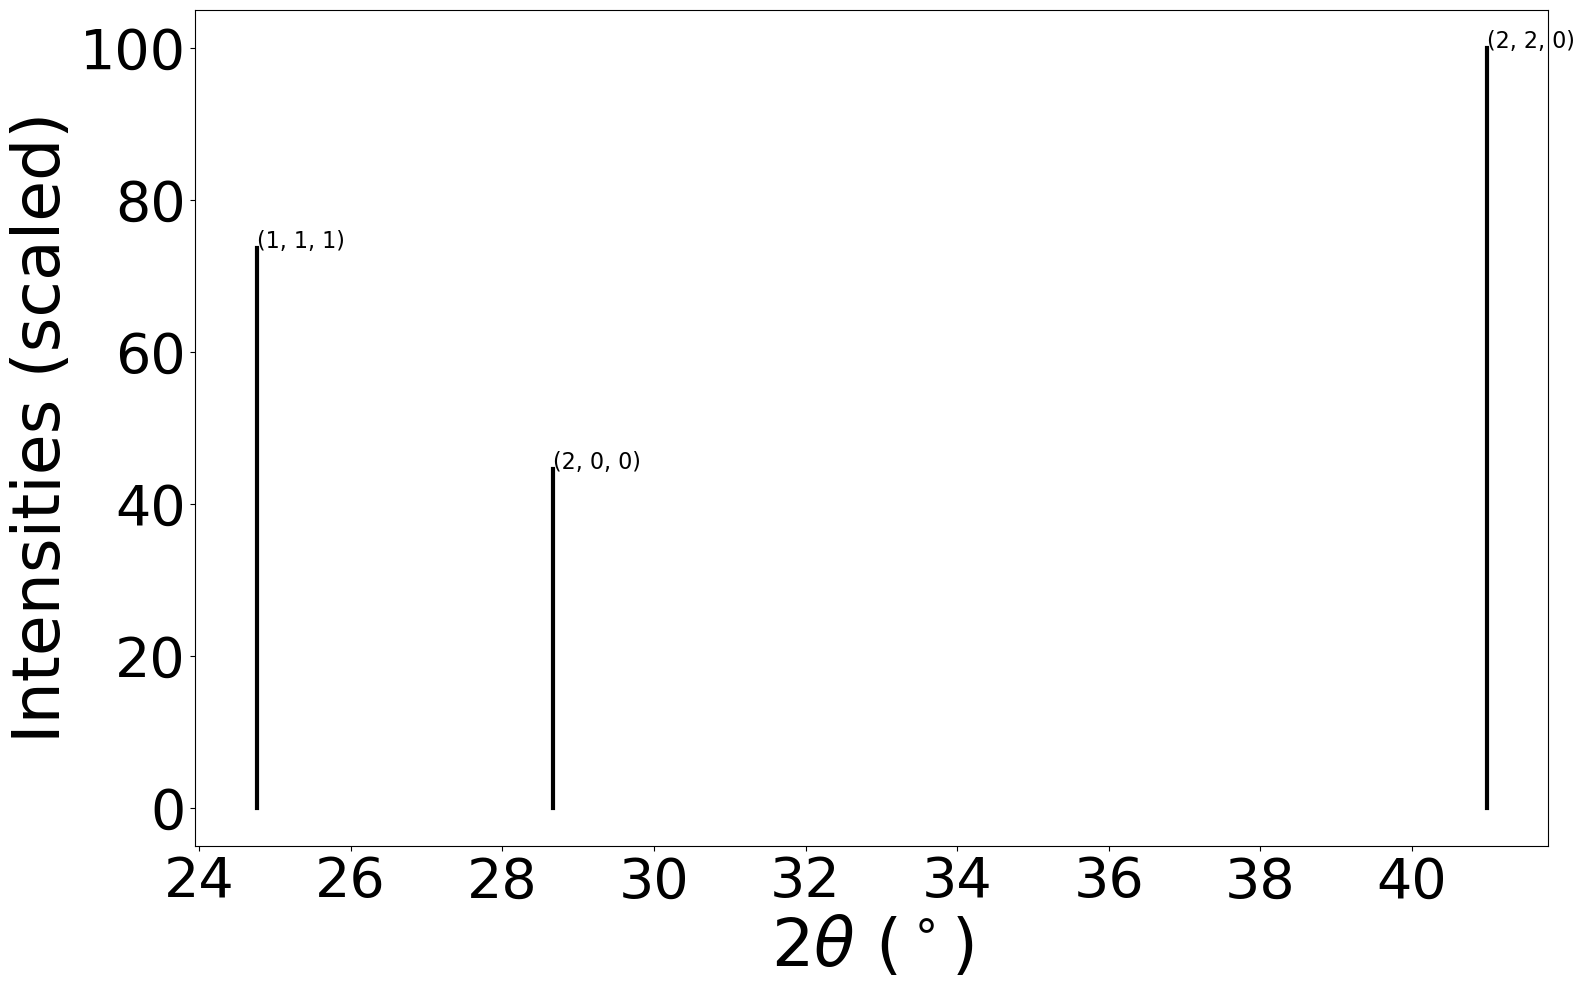

In [207]:
XRD.get_plot(conv_struc, two_theta_range=(0, 48),  annotate_peaks='full')